Importando librerias necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

Importando los datos del dataset 'Steel Industry Energy Consumption'

In [2]:
data = pd.read_csv("Steel_industry_data.csv")
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


Manipulación y preparación de datos

In [3]:
#Descripción de variables numéricas
data.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [4]:
#Descripción de variables categóricas
data.describe(include=['object'])

,date,WeekStatus,Day_of_week,Load_Type
count,35040,35040,35040,35040
unique,35040,2,7,3
top,01/01/2018 00:15,Weekday,Monday,Light_Load
freq,1,25056,5088,18072


In [5]:
#Cofirmamos la cantidad de NaN por columna
data.isna().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [6]:
#Agregando una columna de mes para posterior análisis
data['date'] = pd.to_datetime(data['date'], format="%d/%m/%Y %H:%M")
data['month'] = data['date'].dt.month_name()

EDA

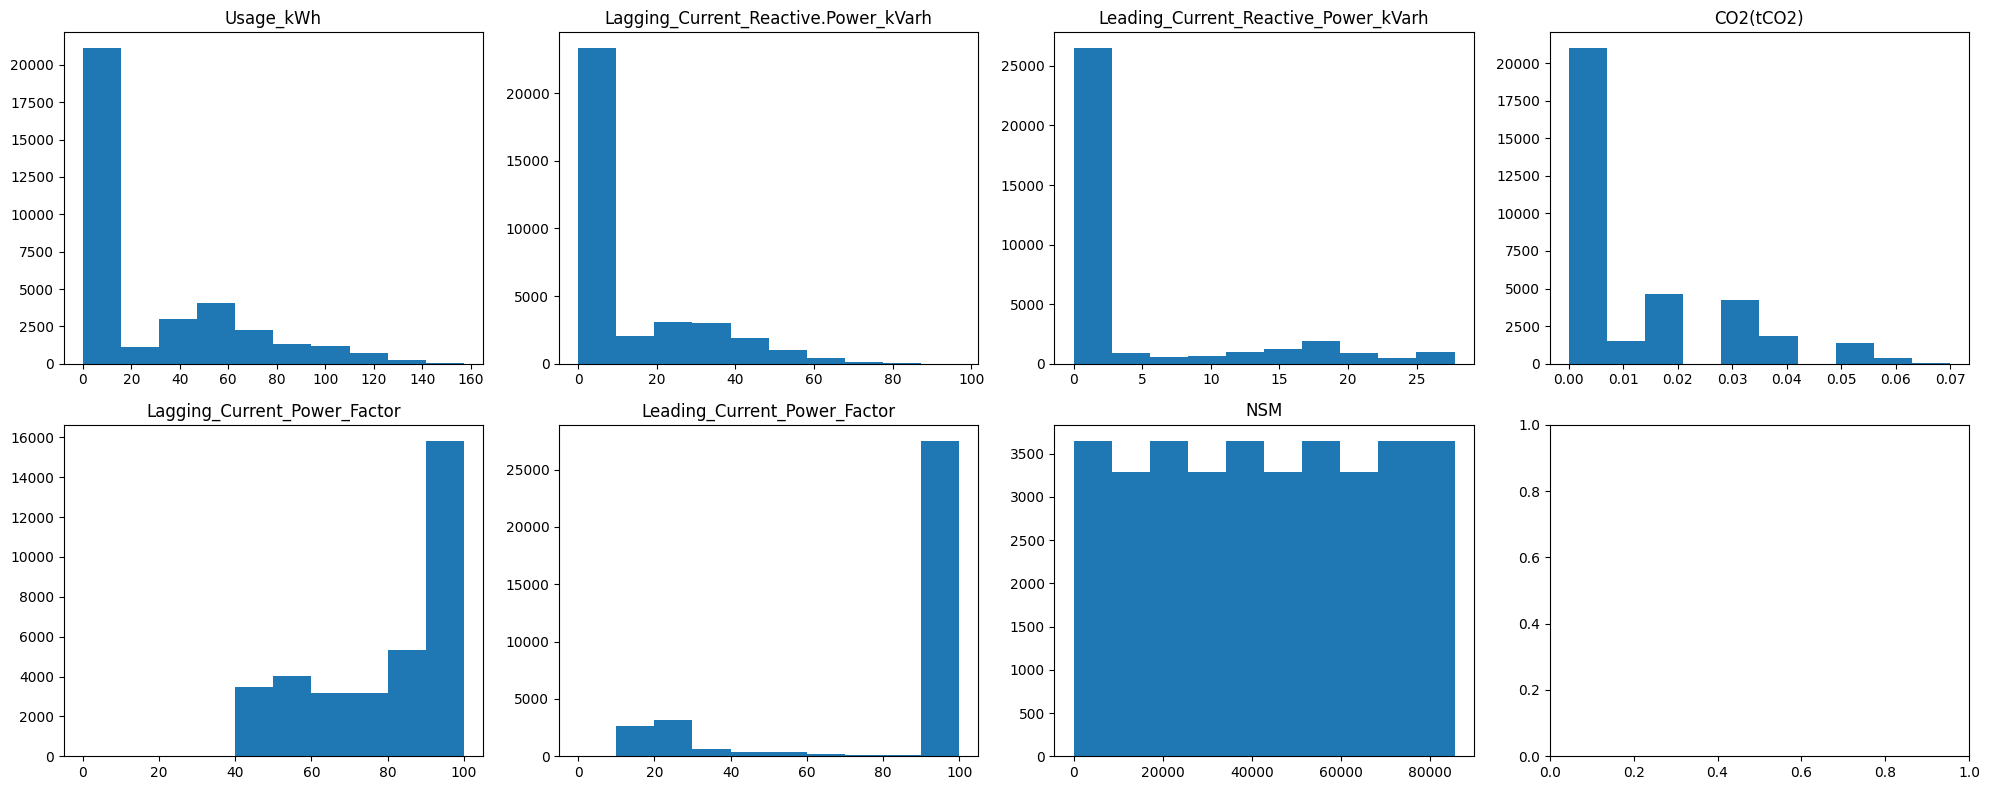

In [7]:
#Graficar las variables numéricas para ver su distribución
numeric_variables = data.select_dtypes(include='number').columns.to_list()
fig, axes = plt.subplots(2,4, figsize = (20,8))
for idx,variable in enumerate(numeric_variables):
    row = idx // 4
    column = idx % 4
    axes[row,column].hist(data[variable])
    axes[row,column].set_title(variable)
plt.tight_layout()
plt.show()

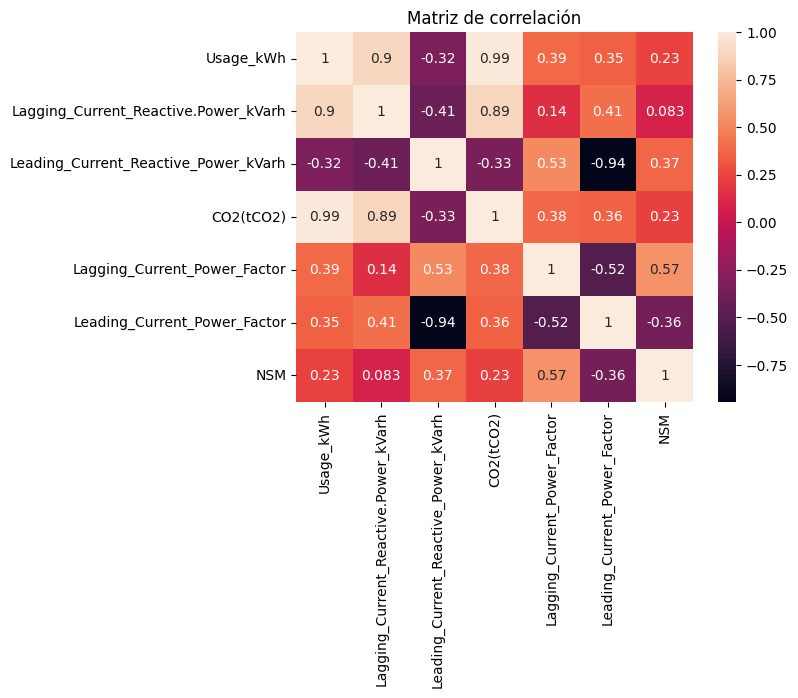

In [8]:
#Graficar matriz de correlación
corr_matrix = data[numeric_variables].corr()
sns.heatmap(corr_matrix, annot = True)
plt.title('Matriz de correlación')
plt.show()

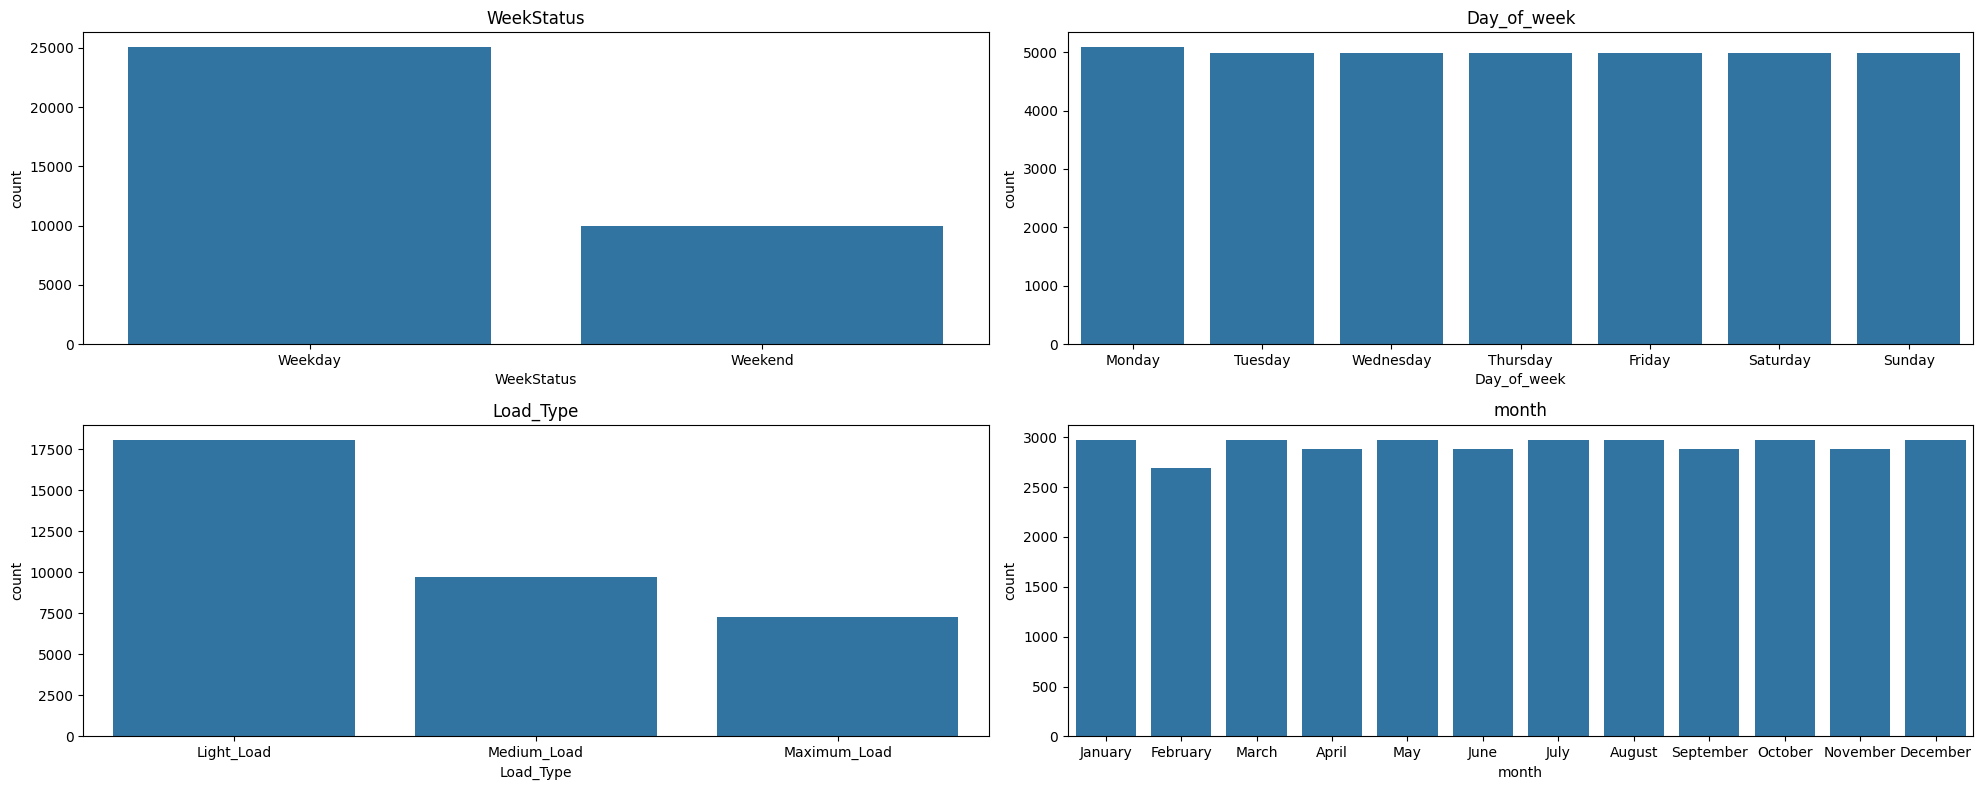

In [9]:
#Countplots de las variables categóricas
object_variables = data.select_dtypes(include = 'object').columns.to_list()
fig, axes = plt.subplots(2,2, figsize = (20,8))
for idx,variable in enumerate(object_variables):
    row = idx // 2
    column = idx % 2
    sns.countplot(x=variable, data=data, ax = axes[row,column])
    axes[row,column].set_title(variable)
plt.tight_layout()
plt.show()

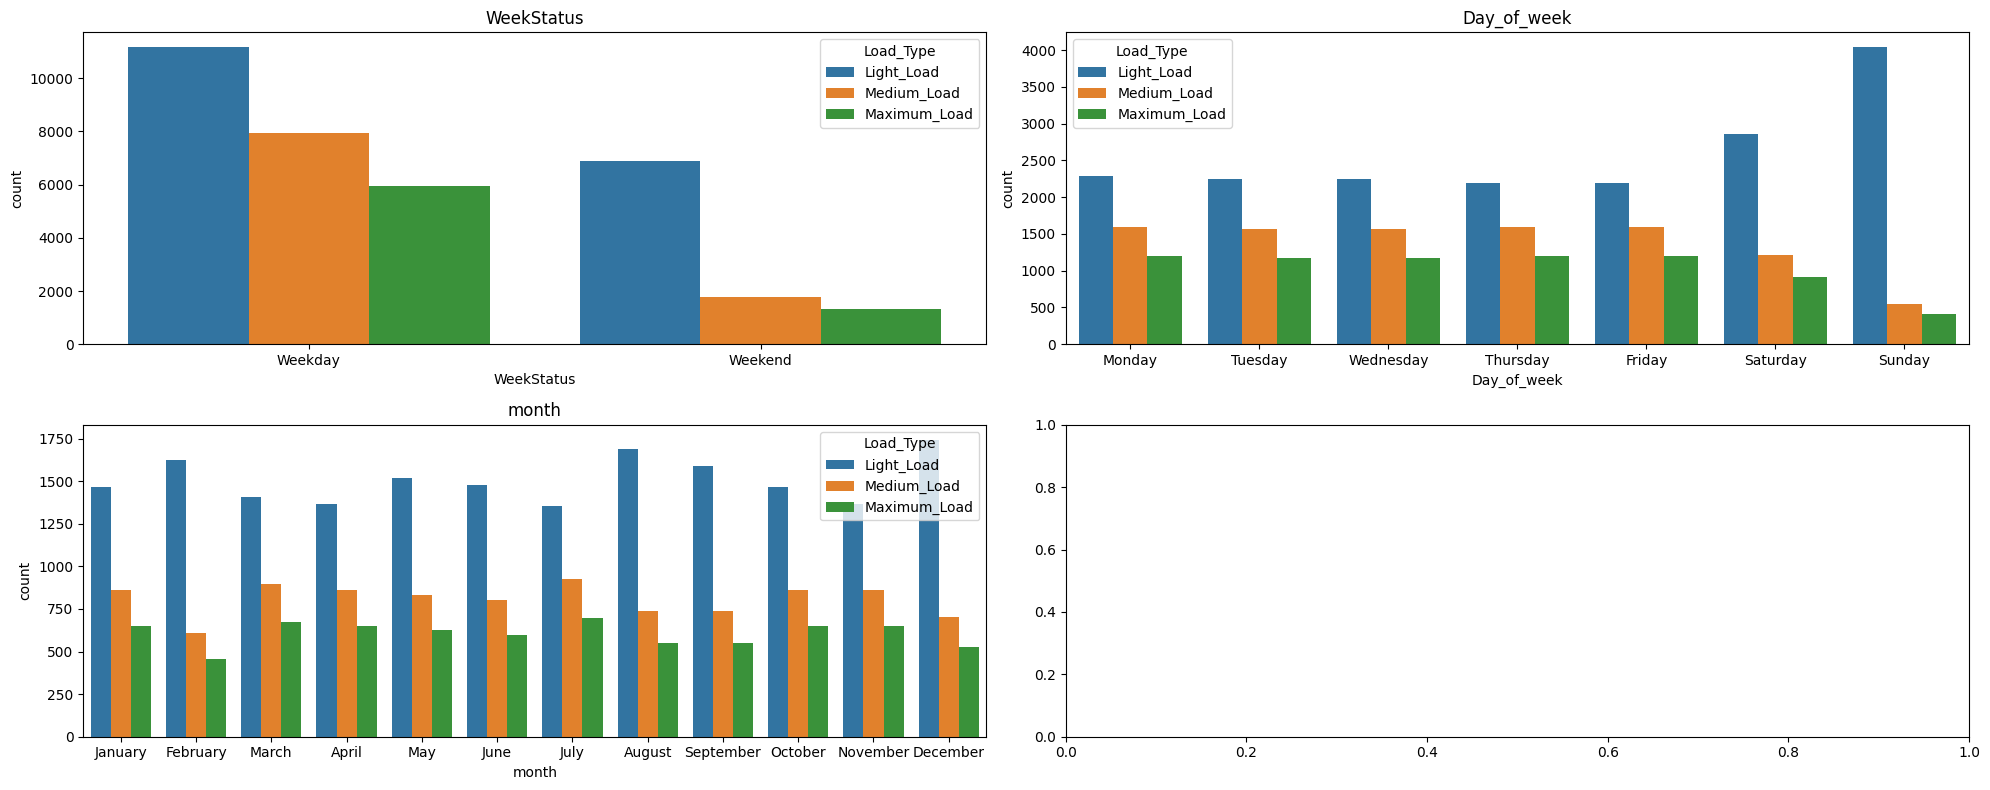

In [10]:
#Relación de variables categóricas con variable objetivo
object_variables.remove('Load_Type')
fig, axes = plt.subplots(2,2, figsize = (20,8))
for idx,variable in enumerate(object_variables):
    row = idx // 2
    column = idx % 2
    sns.countplot(x=variable, data=data, ax = axes[row,column], hue = 'Load_Type')
    axes[row,column].set_title(variable)
plt.tight_layout()
plt.show()

In [11]:
#'Scaling' la data numérica
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_variables])

#Aplicando reducción de dimensionalidad
pca = PCA(n_components=0.95)  
data_pca = pca.fit_transform(data_scaled)
cantidad_variables = data_pca.shape[1]
print(f'Se redujo a {cantidad_variables} variables numéricas')
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_pca.shape[1])])

Se redujo a 4 variables numéricas


In [12]:
#Codificación de variables categóricas
data_encoded_df = pd.get_dummies(data[object_variables], columns=object_variables, drop_first=True)

In [13]:
#Concatenando nuevo dataframe
X = pd.concat([data_encoded_df, pca_df], axis=1)

In [14]:
#Variable objetivo codificada
le = LabelEncoder()
y = le.fit_transform(data['Load_Type'])

In [15]:
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
label_mapping


{'Light_Load': 0, 'Maximum_Load': 1, 'Medium_Load': 2}

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


param_grid = {
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNeighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 11],
            'weights': ['uniform', 'distance']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    }
}

results = {}
for name, config in param_grid.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'best_params': grid_search.best_params_,
        'accuracy': accuracy
    }

df_results = pd.DataFrame([
    {'Model': name, 'Accuracy': result['accuracy'], 'Best Params': result['best_params']}
    for name, result in results.items()
]).sort_values(by='Accuracy', ascending=False)

print(df_results)


/Users/cesargares/Library/CloudStorage/GoogleDrive-witherbosses@gmail.com/Mi unidad/Personal Julio/Maestria/MLOps/.venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


                Model  Accuracy  \
0        RandomForest  0.929509   
5        DecisionTree  0.924372   
2          KNeighbors  0.889412   
1                 SVC  0.882420   
3  LogisticRegression  0.760559   
4          NaiveBayes  0.703910   

                                         Best Params  
0  {'max_depth': None, 'min_samples_split': 2, 'n...  
5        {'max_depth': None, 'min_samples_split': 2}  
2          {'n_neighbors': 3, 'weights': 'distance'}  
1                         {'C': 10, 'kernel': 'rbf'}  
3                       {'C': 10, 'solver': 'lbfgs'}  
4                                                 {}  


Mejor modelo utilizando grid search con mejor accuracy

In [ ]:
model = RandomForestClassifier(max_depth=None,min_samples_split=2, n_estimators=200)

Evaluamos con una red neuronal para ver si es mejor que nuestro modelo de machine learning


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Dividir los datos en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Capa oculta con 64 neuronas y función de activación ReLU
model.add(Dense(32, activation='relu'))  # Segunda capa oculta con 32 neuronas y función de activación ReLU
model.add(Dense(3, activation='softmax'))  # Capa de salida (asumiendo 3 clases en y), usando softmax

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo (sin GridSearch, solo entrenamiento inicial)
history = model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

# Evaluar el modelo en los datos de prueba
y_pred = np.argmax(model.predict(X_test), axis=-1)
accuracy = accuracy_score(y_test, y_pred)

# Imprimir el accuracy
print(f'Accuracy del modelo de red neuronal: {accuracy:.4f}')


Epoch 1/50


/Users/cesargares/Library/CloudStorage/GoogleDrive-witherbosses@gmail.com/Mi unidad/Personal Julio/Maestria/MLOps/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 301us/step - accuracy: 0.7580 - loss: 0.5096
Epoch 2/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - accuracy: 0.8798 - loss: 0.2777
Epoch 3/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 0.9049 - loss: 0.2268
Epoch 4/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.9176 - loss: 0.2007
Epoch 5/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.9171 - loss: 0.1852
Epoch 6/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 280us/step - accuracy: 0.9235 - loss: 0.1723
Epoch 7/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 276us/step - accuracy: 0.9277 - loss: 0.1658
Epoch 8/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.9326 - loss: 0.1571
Epoch 9/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 297us/step - accuracy: 0.9357 - loss: 0.1468
Epoch 10/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 286us/step - accuracy: 0.9362 - loss: 0.1455
Epoch 11/50
2804/2804 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step - accuracy: 0.9415 - loss: 0.1376
Epoch 12/50
2804/28